In [1]:
%load_ext watermark
%watermark  -d -u -a "Shihao Yang, Yifan Zhang, Kexiao Zhu" -v -p numpy,scipy,matplotlib,sklearn

Author: Shihao Yang, Yifan Zhang, Kexiao Zhu

Last updated: 2021-12-06

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
scipy     : 1.6.2
matplotlib: 3.3.4
sklearn   : 0.24.1



# Data Processing

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("winequalityN.csv")
print(df.head())
print(df.info())
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [4]:
label_list = []
labels_map = {
    "white": 0,
    "red": 1}
for i in range(len(df)):
    label_list.append(labels_map[df["type"][i]])
df["type"] = label_list

In [5]:
labels_map = {
    10: 'high',
    9: 'high',
    8: 'high',
    7: 'medium',
    6: 'medium',
    5: 'medium',
    4: 'low',
    3: 'low',
    2: 'low',
    1: 'low'
}

In [6]:
df['quality'] = df['quality'].map(labels_map)

In [7]:
labels_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}

In [8]:
label_list2 = []
for i in range(len(df)):
    label_list2.append(labels_map[df["quality"][i]])
df["label"] = label_list2
df = df.drop(columns=['quality'])
# df = df.dropna()
df = df.fillna(df.mean())#fill the na value with the overall mean

In [9]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# Feature Selection

In [10]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.ensemble import ExtraTreesClassifier
# load data
array = df.values
X = array[:,0:12]
Y = array[:,12]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.01088162 0.08609313 0.1091196  0.08454597 0.08603346 0.08832474
 0.10163666 0.08547821 0.07849625 0.08715651 0.0868437  0.09539014]


As we can see from above feature importance, we can exclude the wine type since it is the least important feature among others.

In [11]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# data = df.values
# data = imputer.fit_transform(df.values)
# data
df = df.dropna()
df = df.drop(columns=['type'])

X = df[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]].values
y = df['label'].values

# Model Training

In [12]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (4547, 11)
y_train.shape: (4547,)
X_test.shape: (1950, 11)
y_test.shape: (1950,)


In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_score=lr.score(X_test,y_test)

In [14]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm=svm.score(X_test,y_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state = 10)
rf.fit(X_train,y_train)
rf_score = rf.score(X_test,y_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn_score=knn.score(X_test,y_test)

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt=dt.score(X_test,y_test)

In [18]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb=nb.score(X_test,y_test)

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
# extra tree
forest = ExtraTreesClassifier(n_estimators=100, random_state = 3)

forest.fit(X_train, y_train)

extra_tree_score = forest.score(X_test, y_test)

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=123)
ada.fit(X_train, y_train)
ada_score = ada.score(X_test, y_test)

In [21]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hist = HistGradientBoostingClassifier(random_state=123)
hist.fit(X_train, y_train)
hist_score = hist.score(X_test, y_test)

# Grid Search for Decision Tree and KNN

In [22]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': [2, 3, 4, 5, 10, 20, 50],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 50, None],
    'criterion': ['gini','entropy']
}


grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

grid.fit(X_train, y_train)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min

[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=50; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=3, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=4, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=4, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=4, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=10, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END .criterion=gini, max_depth=15, min_samples_split=10; total time=   0.0s
[CV] END .criterion=gini, max_depth=15, min_samples_split=10; total time=   0.0s
[CV] END .criterion=gini, ma

[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, max_depth=50, min_samples_split=2; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini,

[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy,

[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_split=3; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=10; total time=   0.0s
[CV] EN

[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2; total time=  

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 50, None],
                         'min_samples_split': [2, 3, 4, 5, 10, 20, 50]},
             verbose=2)

In [23]:
grid_search_dt = grid.best_score_

In [24]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}

In [25]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

gs = GridSearchCV(estimator=knn,
                  param_grid=param_grid,
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=9), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13]})

In [26]:
grid_search_knn = gs.best_score_

In [27]:
gs.best_params_

{'n_neighbors': 9}

# Table of Model Scores - 1

In [28]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVM', 
              'Random Forest', 'Naive Bayes', 'Decision Tree',
             'Extra Tree','Ada Boosting', 'Hist Gradient Boosting', 'Decision Tree with Grid Search',
             'KNN with Grid Search'],
    'Score': [lr_score,knn_score,svm,rf_score,nb,dt, extra_tree_score, ada_score, hist_score, grid_search_dt, grid_search_knn]})

In [29]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.941026
6,Extra Tree,0.941026
8,Hist Gradient Boosting,0.939487
9,Decision Tree with Grid Search,0.932044
2,SVM,0.931795
10,KNN with Grid Search,0.931384
1,KNN,0.931282
7,Ada Boosting,0.894359
5,Decision Tree,0.893846
4,Naive Bayes,0.836410


# Ensemble Methods

Based on the table above, we can choose some models with higher scores to use some ensemble methods. 

In [30]:
from mlxtend.classifier import EnsembleVoteClassifier
# Majority Voting
clf1 = RandomForestClassifier(n_estimators=100, random_state = 2)
clf2 = ExtraTreesClassifier(n_estimators=100, random_state=1)
clf3 = HistGradientBoostingClassifier(random_state=123)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    clf.fit(X_train, y_train)
    print("Train Accuracy: %0.2f [%s]" % (clf.score(X_train, y_train), label))
    
vote_score = eclf.score(X_test, y_test)

Train Accuracy: 1.00 [Classifier 1]
Train Accuracy: 1.00 [Classifier 2]
Train Accuracy: 1.00 [Classifier 3]
Train Accuracy: 1.00 [Ensemble]


In [31]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
# BAGGING
forest = RandomForestClassifier(n_estimators=100)


bag = BaggingClassifier(base_estimator=forest,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

bag.fit(X_train, y_train)
bag_score = bag.score(X_test, y_test)

In [32]:
# stacking
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier


clf1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, min_samples_split= 2)
clf2 = RandomForestClassifier(random_state=123)
clf3 = HistGradientBoostingClassifier(random_state=123)
clf4 = ExtraTreesClassifier(n_estimators=100)

lr = LogisticRegression(random_state=123, max_iter=1000)

estimators = [('clf1', clf1),
              ('clf2', clf2),
              ('clf3', clf3),
              ('clf4', clf4)]

sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr, 
                          cv=10)


sclf.fit(X_train, y_train)
stacking_score = sclf.score(X_test, y_test)

In [33]:
# stack_method{‘auto’, ‘predict_proba’, ‘decision_function’, ‘predict’}, default=’auto’
from mlxtend.classifier import StackingCVClassifier


sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4], 
                            meta_classifier=lr, 
                            use_probas=True, # changed
                            drop_proba_col='last',
                            #use_features_in_secondary=True,
                            cv=10,
                            random_state=123)


sclf.fit(X_train, y_train)
stack_cv_score = sclf.score(X_test, y_test)

# Table of Model Scores - 2

In [34]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVM', 
              'Random Forest', 'Naive Bayes', 'Decision Tree',
             'Extra Tree','Ada Boosting', 'Hist Gradient Boosting', 'Decision Tree with Grid Search',
             'KNN with Grid Search', 'Bagging', 'Stacking', 'Stacking CV'],
    'Score': [lr_score,knn_score,svm,rf_score,nb,dt, extra_tree_score, ada_score, hist_score, grid_search_dt, grid_search_knn, bag_score, stacking_score, stack_cv_score]})

In [35]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.941026
6,Extra Tree,0.941026
13,Stacking CV,0.940513
8,Hist Gradient Boosting,0.939487
12,Stacking,0.939487
11,Bagging,0.935897
9,Decision Tree with Grid Search,0.932044
2,SVM,0.931795
10,KNN with Grid Search,0.931384
1,KNN,0.931282


# Test our model in another Data Set

In [36]:
url = 'https://raw.githubusercontent.com/Hawk9808/STAT-451-project-group/main/winequality-red.csv'
df_test = pd.read_csv(url, error_bad_lines=False)
# df_test.head()
# df_test.info()

In [37]:
labels_map = {
    10: 'high',
    9: 'high',
    8: 'high',
    7: 'medium',
    6: 'medium',
    5: 'medium',
    4: 'low',
    3: 'low',
    2: 'low',
    1: 'low'
}
df_test['quality'] = df_test['quality'].map(labels_map)
labels_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}
label_list2 = []
for i in range(len(df_test)):
    label_list2.append(labels_map[df_test["quality"][i]])
df_test["label"] = label_list2

df_test = df_test.drop(columns=['quality'])
df_test = df_test.fillna(df.mean())#fill the na value with the overall mean
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [38]:
X = df_test[['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]].values
y = df_test['label'].values

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf_score=rf.score(X,y)

print(f"Test Accuracy: {100*rf_score:0.2f}%")

Test Accuracy: 98.31%


In [39]:
forest = ExtraTreesClassifier(n_estimators=100)
forest.fit(X_train, y_train)
extra_tree_score = forest.score(X, y)
print(f"Test Accuracy: {100*extra_tree_score:0.2f}%")

Test Accuracy: 98.50%


# Feature Importance Analysis

In [40]:
# random forest
vars = np.array(['fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
for name, importance in zip(vars, rf.feature_importances_):
     print(name, "=", importance)

fixed acidity = 0.0803245499401955
volatile acidity = 0.10939975493679512
citric acid = 0.07869267464246751
residual sugar = 0.09227041486539893
chlorides = 0.08316380643745375
free sulfur dioxide = 0.10801571696272541
total sulfur dioxide = 0.09626233844199629
density = 0.09182098759419055
pH = 0.09062171849783357
sulphates = 0.08425908684679383
alcohol = 0.08516895083414959


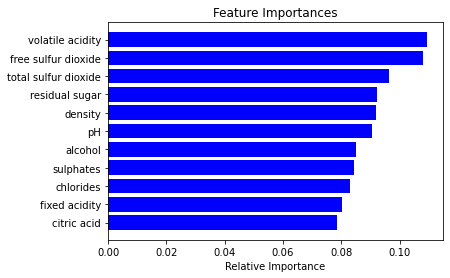

In [41]:
# plot the feature importance
from matplotlib import pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [vars[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [42]:
# extra trees
for name, importance in zip(vars, forest.feature_importances_):
     print(name, "=", importance)

fixed acidity = 0.08119928769008052
volatile acidity = 0.1057925558502816
citric acid = 0.08461125958889491
residual sugar = 0.09039907099065282
chlorides = 0.08522806915367731
free sulfur dioxide = 0.10786318709780163
total sulfur dioxide = 0.09244135877962929
density = 0.08410255726669863
pH = 0.08777260844936398
sulphates = 0.08776852093697282
alcohol = 0.09282152419594651


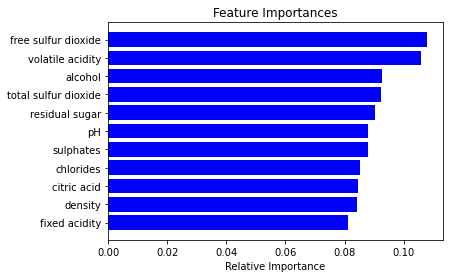

In [43]:
# plot the feature importance
from matplotlib import pyplot as plt
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [vars[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()